# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [8]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>

<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>


In [9]:
df_tesla.head(6)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368
5,2010-11-01,2,7.066


What are the shapes of the dataframes?

In [10]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

How many rows and columns? 

In [11]:
df_tesla.shape

(124, 3)

What are the column names?

In [12]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [13]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


Try the <code>.describe()</code> function to see some useful descriptive statistics

In [14]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [15]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [16]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [17]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [18]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [19]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [20]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [21]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [22]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [23]:
df_btc_price = df_btc_price.dropna()

Recheck the missing value

In [24]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [25]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla['MONTH'].dtypes

dtype('<M8[ns]')

In [26]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_unemployment['MONTH'].dtypes

dtype('<M8[ns]')

In [27]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_search['MONTH'].dtypes

dtype('<M8[ns]')

In [28]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_btc_price['DATE'].dtypes

dtype('<M8[ns]')

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br> To convert our daily data into monthly data, we're going to use the .resample() function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

In [29]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

If we wanted the average price over the course of the month, we could use something like:

In [30]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()

In [31]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


# Data Visualisation

### Notebook Formatting & Style Helpers

In [32]:
# Create locators for ticks on the time axis

In [33]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'TSLA Web Search')

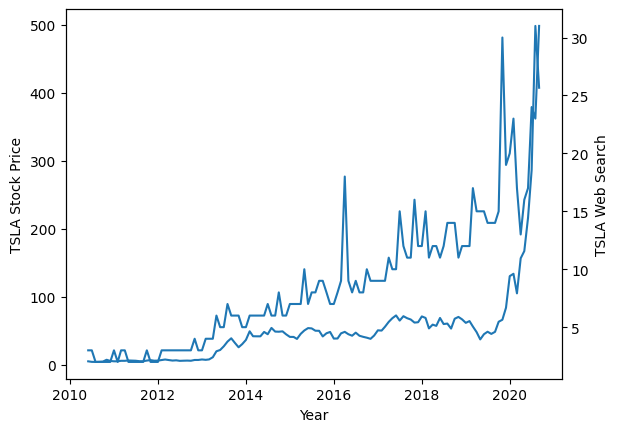

In [34]:
x1 = plt.gca()
x2 = x1.twinx()

x1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
x2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

x1.set_xlabel('Year')
x1.set_ylabel('TSLA Stock Price')
x2.set_ylabel('TSLA Web Search')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'TSLA Web Search')

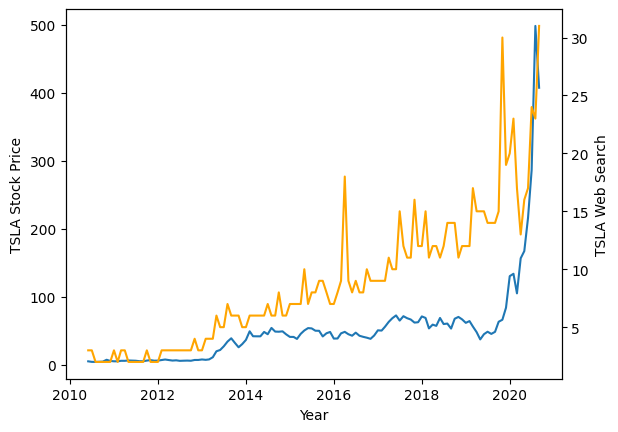

In [35]:
x1 = plt.gca()
x2 = x1.twinx()

x1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
x2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color= 'orange')

x1.set_xlabel('Year')
x1.set_ylabel('TSLA Stock Price')
x2.set_ylabel('TSLA Web Search')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

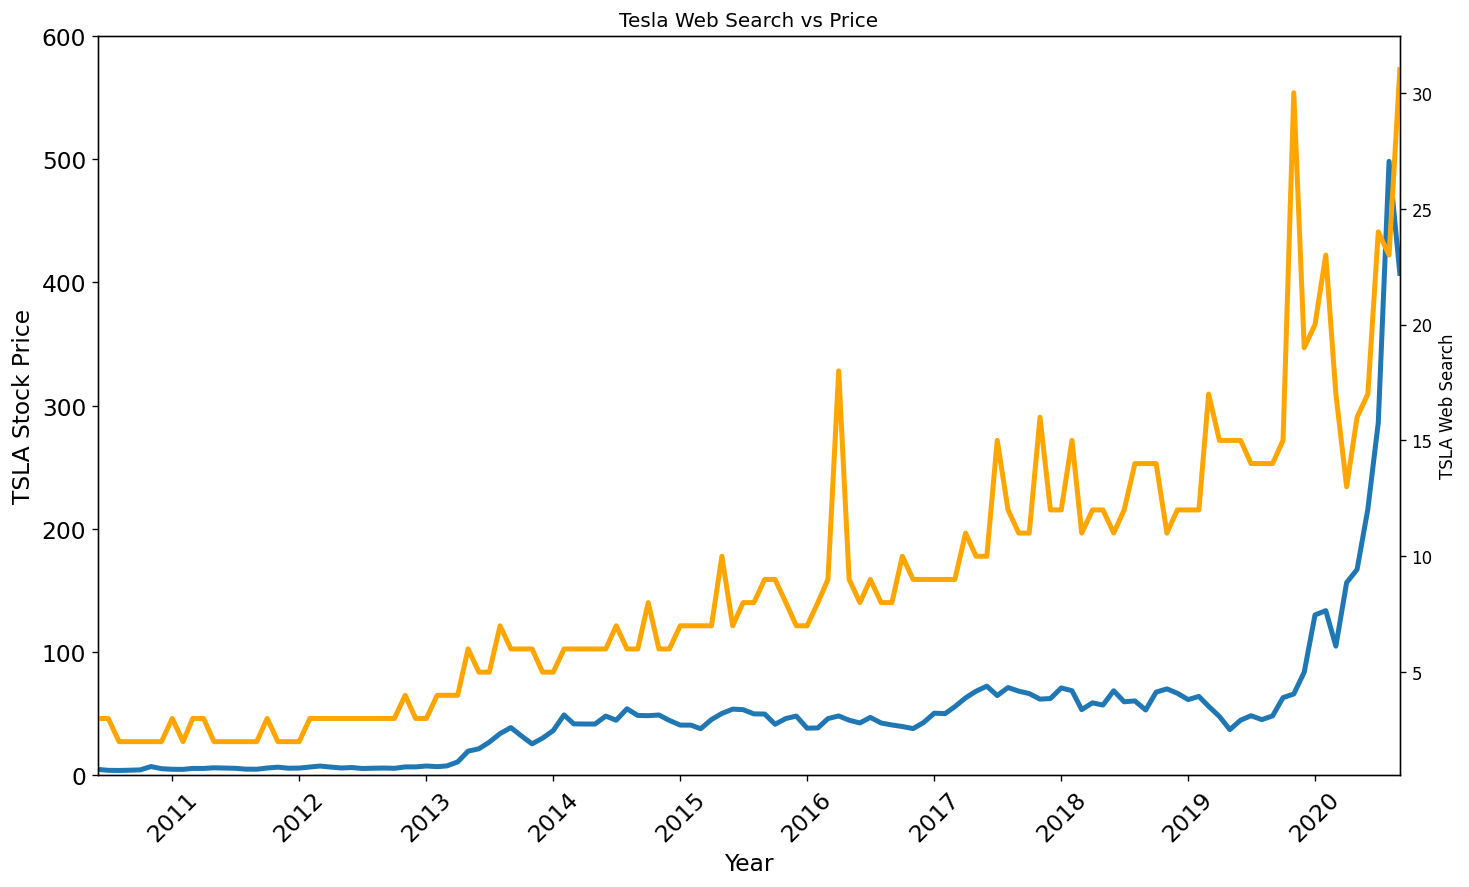

In [36]:
#configure the picture
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Num of set', fontsize=14)
plt.xlabel('Themes', fontsize=14)
plt.title('Tesla Web Search vs Price')

x1 = plt.gca()
x2 = x1.twinx()

#set minimum and maximum values
x1.set_ylim([0,600])
x1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

x1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, linewidth=3)
x2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color= 'orange',linewidth=3)


x1.set_xlabel('Year')
x1.set_ylabel('TSLA Stock Price')
x2.set_ylabel('TSLA Web Search')

plt.show()

How to add tick formatting for dates on the x-axis. 

<h1>Using Locators and DateFormatters to generate Tick Marks on a Time Line</h1>

Adding Locator Tick Marks
When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers.

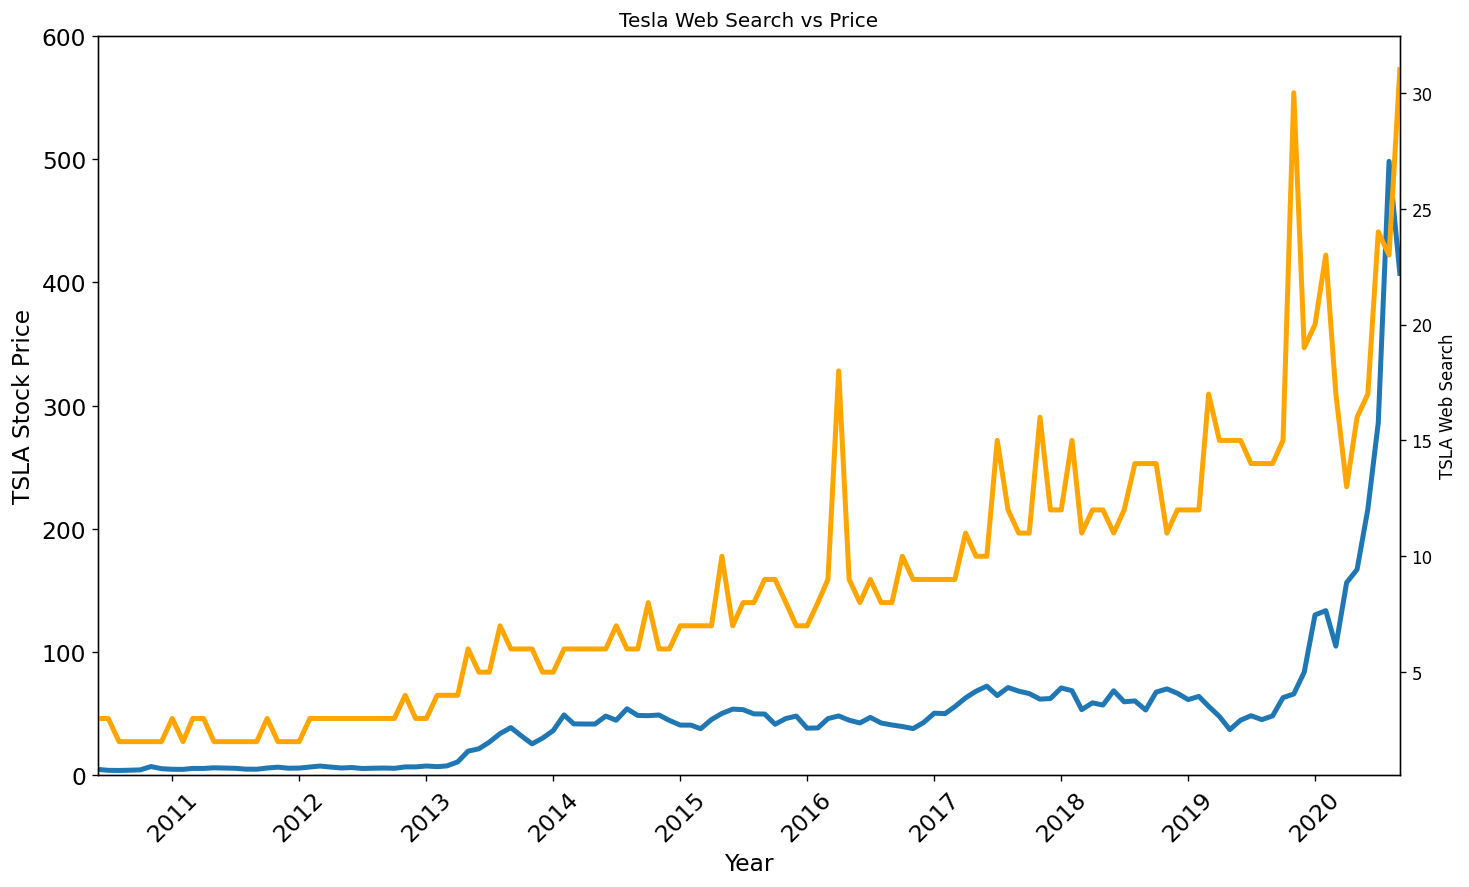

In [37]:
#configure the picture
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Num of set', fontsize=14)
plt.xlabel('Themes', fontsize=14)
plt.title('Tesla Web Search vs Price')

x1 = plt.gca()
x2 = x1.twinx()

#set minimum and maximum values
x1.set_ylim([0,600])
x1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

x1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, linewidth=3)
x2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color= 'orange',linewidth=3)


x1.set_xlabel('Year')
x1.set_ylabel('TSLA Stock Price')
x2.set_ylabel('TSLA Web Search')

#create locators for tick in x-axis
years = mdates.YearLocator()
month = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')



plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

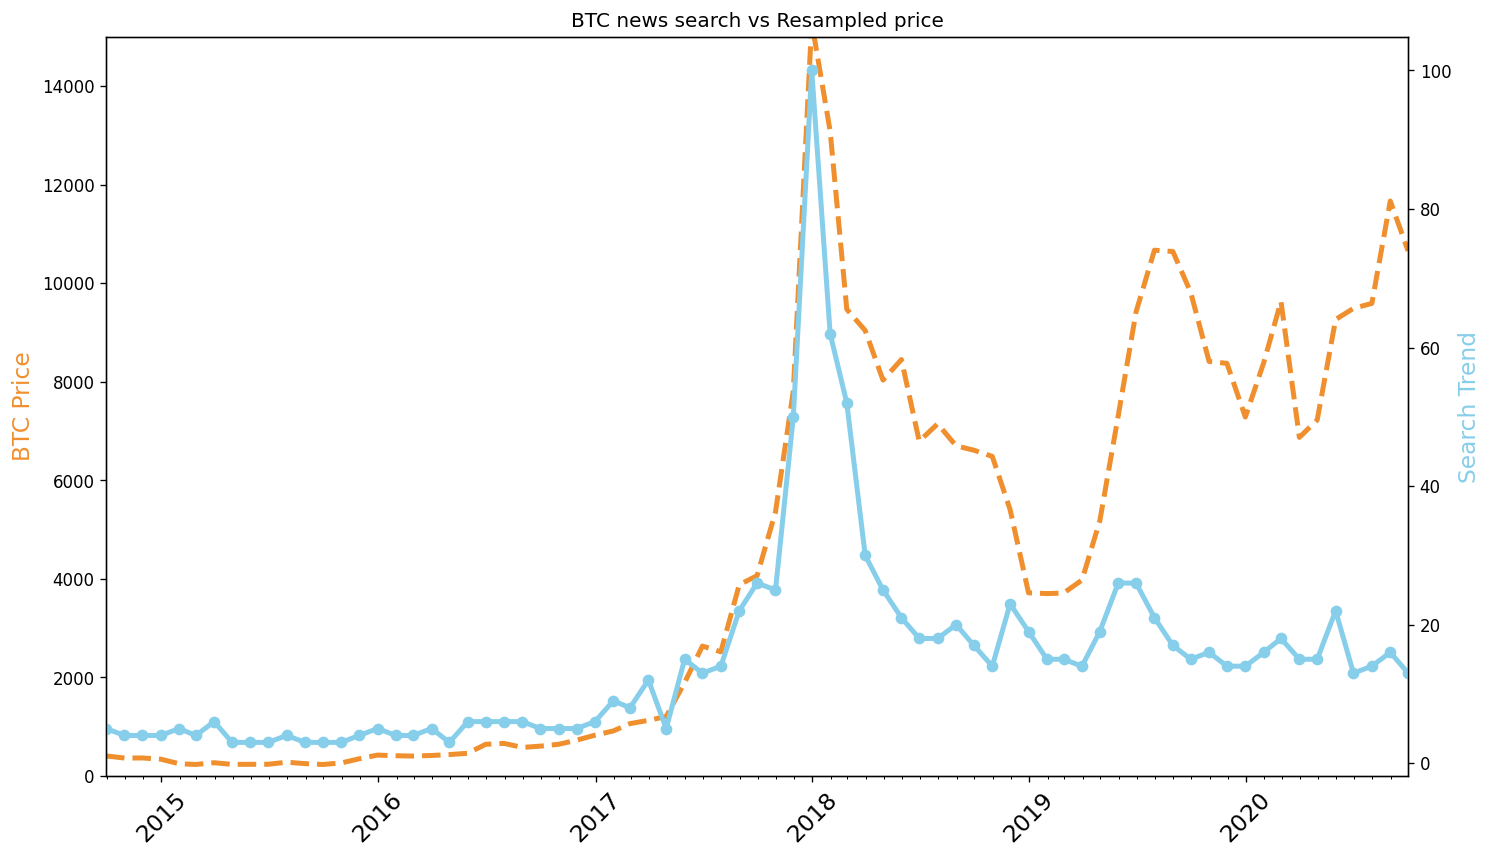

In [48]:
#configure the picture
plt.figure(figsize=(14,8), dpi=120)
plt.title('BTC news search vs Resampled price')
plt.xticks(fontsize=14, rotation=45)

x1 = plt.gca()
x2 = x1.twinx()

x1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
x2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

x1.xaxis.set_major_locator(years)
x1.xaxis.set_major_formatter(year_fmt)
x1.xaxis.set_minor_locator(month)

x1.set_ylim(bottom=0, top=15000)
x1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
x1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
x2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

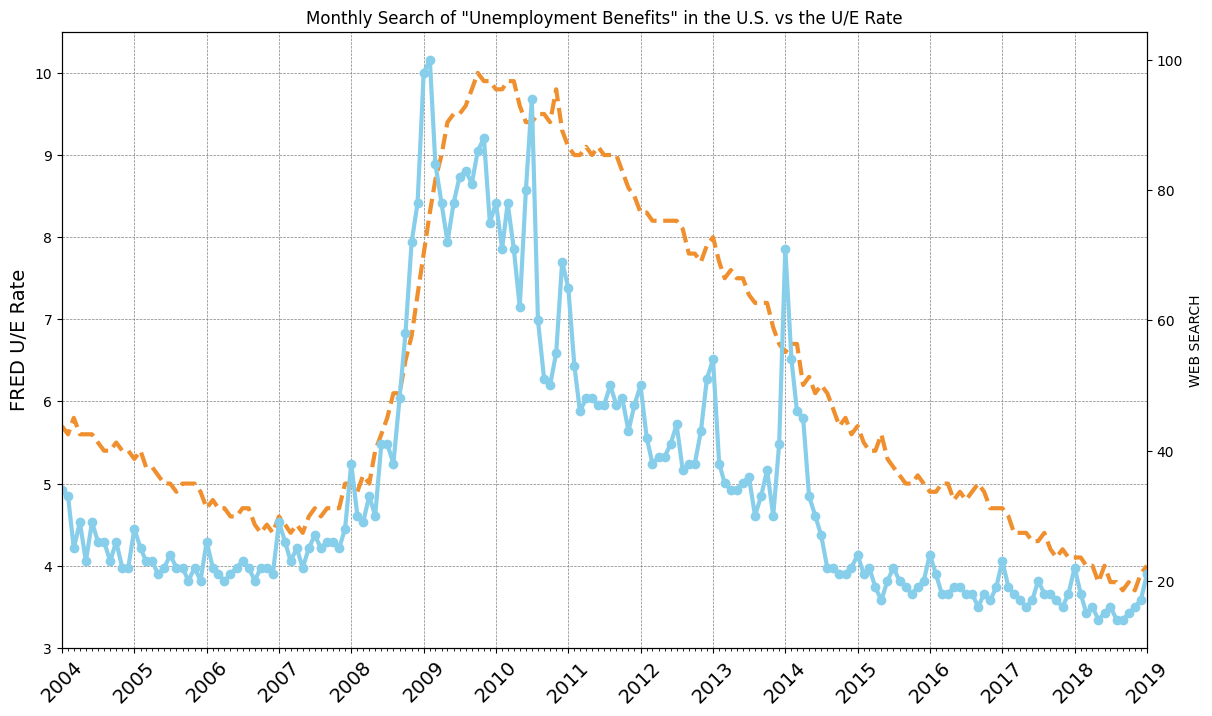

In [67]:
#configure the pic
plt.figure(figsize =(14,8)) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=14, rotation=45)

x1 = plt.gca()
x2 = x1.twinx()

x1.set_ylabel('FRED U/E Rate', fontsize=14)
x2.set_ylabel('WEB SEARCH')

x1.xaxis.set_major_locator(years)
x1.xaxis.set_major_formatter(year_fmt)
x1.xaxis.set_minor_locator(month)

#limitation
x1.set_ylim(bottom=3, top=10.5)
x1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max()) 

# Experiment with the linestyle and markers
x1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='#F08F2E', linewidth=3, linestyle='--')
x2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
x1.grid(color='grey', linewidth=0.5, linestyle='--')
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


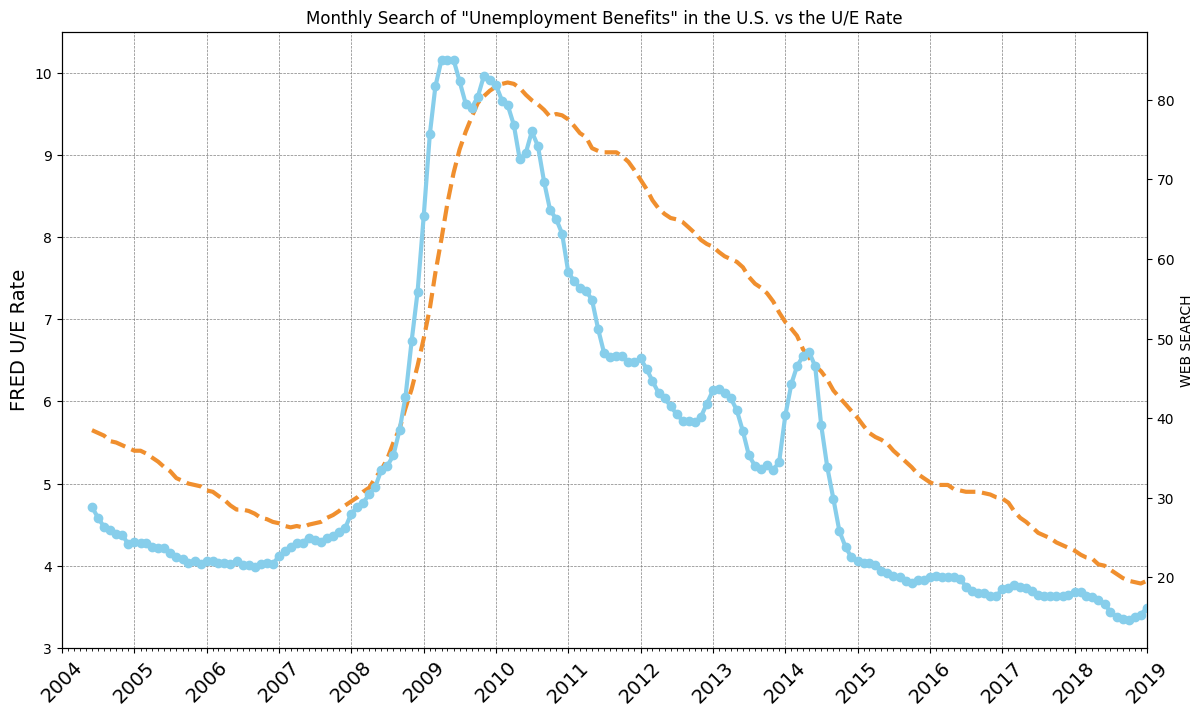

In [72]:
#smoothening
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

#configure the pic
plt.figure(figsize =(14,8)) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=14, rotation=45)

x1 = plt.gca()
x2 = x1.twinx()

x1.set_ylabel('FRED U/E Rate', fontsize=14)
x2.set_ylabel('WEB SEARCH')

x1.xaxis.set_major_locator(years)
x1.xaxis.set_major_formatter(year_fmt)
x1.xaxis.set_minor_locator(month)

#limitation
x1.set_ylim(bottom=3, top=10.5)
x1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max()) 

# Experiment with the linestyle and markers
x1.plot(df_unemployment.MONTH, roll_df.UNRATE, 
         color='#F08F2E', linewidth=3, linestyle='--')
x2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
x1.grid(color='grey', linewidth=0.5, linestyle='--')
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [75]:
df_unemployment20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [78]:
df_unemployment20.MONTH = pd.to_datetime(df_unemployment20.MONTH)
df_unemployment.MONTH.dtype 

dtype('<M8[ns]')

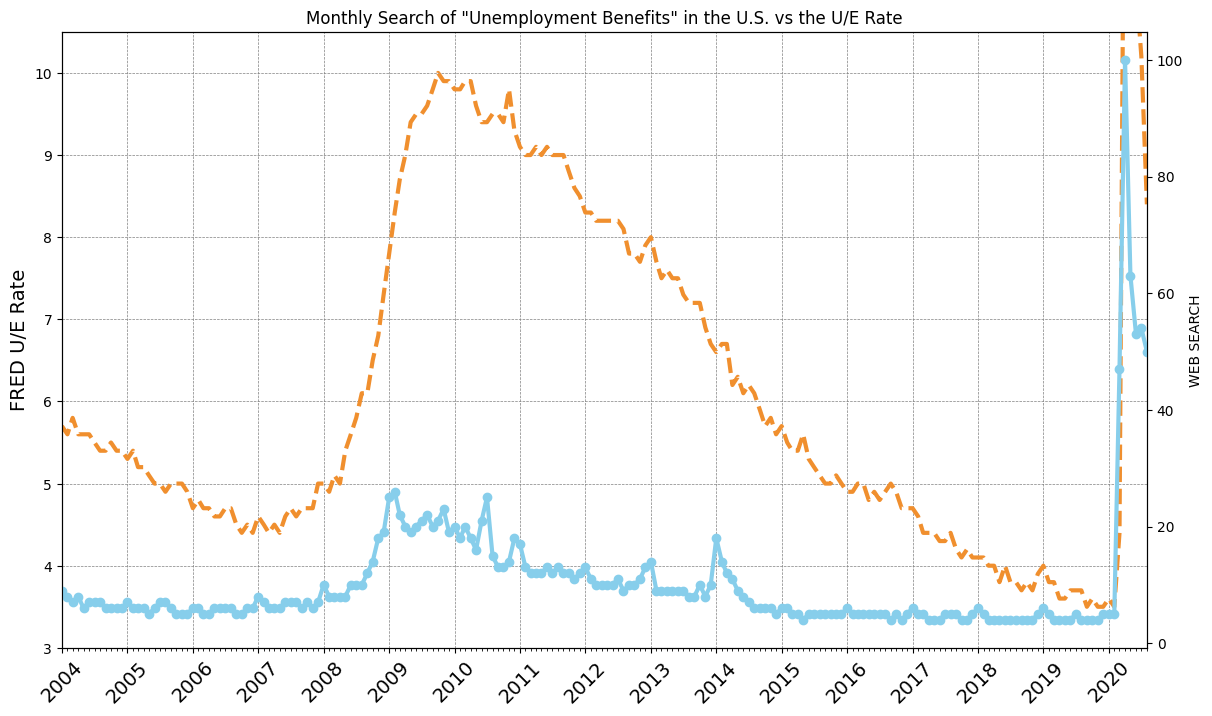

In [84]:
#configure the pic
plt.figure(figsize =(14,8)) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=14, rotation=45)

x1 = plt.gca()
x2 = x1.twinx()

x1.set_ylabel('FRED U/E Rate', fontsize=14)
x2.set_ylabel('WEB SEARCH')

x1.xaxis.set_major_locator(years)
x1.xaxis.set_major_formatter(year_fmt)
x1.xaxis.set_minor_locator(month)

#limitation
x1.set_ylim(bottom=3, top=10.5)
x1.set_xlim(df_unemployment20.MONTH.min(), df_unemployment20.MONTH.max()) 

# Experiment with the linestyle and markers
x1.plot(df_unemployment20.MONTH, df_unemployment20.UNRATE, 
         color='#F08F2E', linewidth=3, linestyle='--')
x2.plot(df_unemployment20.MONTH, df_unemployment20.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
x1.grid(color='grey', linewidth=0.5, linestyle='--')
plt.show()

<h1>Learning Points and Summary</h1>

<ul>
    <li>How to use .describe() to quickly see some descriptive statistics at a glance.</li>
    <li>How to use .resample() to make a time-series data comparable to another by changing the periodicity.</li>
    <li>How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).</li>
    <li>How to find the number of NaN values with .isna().values.sum()</li>
    <li>How to change the resolution of a chart using the figure's dpi</li>
    <li>How to create dashed '--' and dotted '-.' lines using linestyles</li>
    <li>How to use different kinds of markers (e.g., 'o' or '^') on charts.</li>
    <li>Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).</li>
    <li>Using .grid() to help visually identify seasonality in a time series.</li>
 
</ul> 